# 교육학과 Clustering

### Matplotlib에서 폰트 설정

In [4]:
import urllib
from matplotlib import font_manager
from matplotlib import pyplot as plt

font_path = 'NanumGothic.ttf'
with open(font_path, 'wb') as f: 
    f.write(urllib.request.urlopen("https://github.com/team-monolith-product/jupyter-nanum/raw/main/NanumGothic.ttf").read())

# 글꼴을 등록합니다.
font_manager.fontManager.addfont(font_path)
plt.rcParams['font.family'] = font_manager.FontProperties(fname=font_path).get_name()

### [Step1] 데이터 로드

In [5]:
import pandas as pd

df = pd.read_csv('datasets/시험점수.csv')
df

,나이,점수
0,23,12
1,28,91
2,29,2
3,24,98
4,22,6
...,...,...
115,20,85
116,22,11
117,28,84
118,23,4


### [Step2] 데이터 파악하기

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   나이      120 non-null    int64
 1   점수      120 non-null    int64
dtypes: int64(2)
memory usage: 2.0 KB


In [6]:
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   나이      120 non-null    int64
 1   점수      120 non-null    int64
dtypes: int64(2)
memory usage: 2.0 KB


### [Step 3] 모델 구성 및 학습하기

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

model = KMeans(n_clusters = 3) #클러스터의 수를 3개로 설정합니다. 
pred = model.fit_predict(df[['나이', '점수']]) # dataframe에서 나이와 점수 정보를 활용하여 클러스터링을 진행합니다.
df['클러스터'] = pred
df

,나이,점수,클러스터
0,23,12,1
1,28,91,0
2,29,2,1
3,24,98,0
4,22,6,1
...,...,...,...
115,20,85,0
116,22,11,1
117,28,84,0
118,23,4,1


### [Step 4] 결과 시각화하기

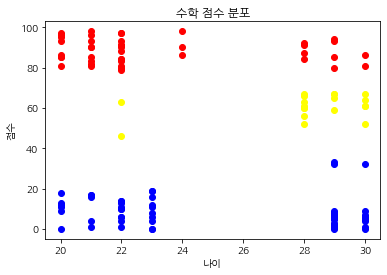

In [8]:
from matplotlib import pyplot as plt

df1 = df[df['클러스터'] == 0] # 클러스터 열의 값이 0인 데이터 모음 : df1.  
df2 = df[df['클러스터'] == 1] # 클러스터 열의 값이 1인 데이터 모음 : df2.
df3 = df[df['클러스터'] == 2] # 클러스터 열의 값이 2인 데이터 모음 : df3. 

plt.scatter(df1['나이'],df1['점수'],color = 'red') # x축을 나이, y축을 점수로 했을 때의 산점도를 붉은색으로 설정. 
plt.scatter(df2['나이'],df2['점수'],color = 'blue') # x축을 나이, y축을 점수로 했을 때의 산점도를 파랑색으로 설정. 
plt.scatter(df3['나이'],df3['점수'],color = 'yellow')# x축을 나이, y축을 점수로 했을 때의 산점도를 노랑색으로 설정. 

plt.title('수학 점수 분포')
plt.xlabel('나이')
plt.ylabel('점수')

plt.show()

### [Step 5] 데이터 정규화하기

In [10]:
#분석시에 변수들의 스케일이 너무 다른 경우 제대로 학습이 이루어지지 않습니다. 그래서 scaler가 필요합니다. 

scaler = MinMaxScaler() #모든 값을 0~1사이로 바꾸는 정규화 함수 
scaler.fit(df[['나이']]) #나이 열을 scaler에 맞게 fit하고 
df['나이'] = scaler.transform(df[['나이']]) #transform 함수를 통해 변환합니다. 

scaler = MinMaxScaler() #모든 값을 0~1사이로 바꾸는 정규화 함수 
scaler.fit(df[['점수']])
df['점수'] = scaler.transform(df[['점수']])

df

,나이,점수,클러스터
0,0.3,0.122449,1
1,0.8,0.928571,0
2,0.9,0.020408,1
3,0.4,1.000000,0
4,0.2,0.061224,1
...,...,...,...
115,0.0,0.867347,0
116,0.2,0.112245,1
117,0.8,0.857143,0
118,0.3,0.040816,1


### [Step 6] 정규화한 데이터로 모델 학습하기

In [11]:
#정규화한 데이터로 새롭게 클러스터링을 진행합니다. (클러스터 수 3개)

model = KMeans(n_clusters = 3)
pred = model.fit_predict(df[['나이', '점수']])
df['클러스터'] = pred
df

,나이,점수,클러스터
0,0.3,0.122449,2
1,0.8,0.928571,1
2,0.9,0.020408,1
3,0.4,1.000000,0
4,0.2,0.061224,2
...,...,...,...
115,0.0,0.867347,0
116,0.2,0.112245,2
117,0.8,0.857143,1
118,0.3,0.040816,2


### [Step 7] 결과 시각화하기2

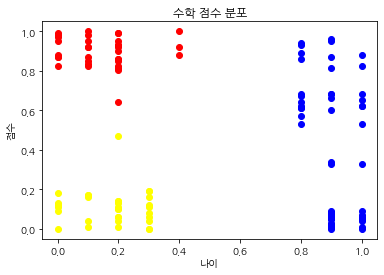

In [12]:
from matplotlib import pyplot as plt

df1 = df[df['클러스터'] == 0] # 클러스터 열의 값이 0인 데이터 모음 : df1.  
df2 = df[df['클러스터'] == 1] # 클러스터 열의 값이 1인 데이터 모음 : df2.
df3 = df[df['클러스터'] == 2] # 클러스터 열의 값이 2인 데이터 모음 : df3. 

plt.scatter(df1['나이'],df1['점수'],color = 'red') # x축을 나이, y축을 점수로 했을 때의 산점도를 붉은색으로 설정. 
plt.scatter(df2['나이'],df2['점수'],color = 'blue') # x축을 나이, y축을 점수로 했을 때의 산점도를 파랑색으로 설정. 
plt.scatter(df3['나이'],df3['점수'],color = 'yellow')# x축을 나이, y축을 점수로 했을 때의 산점도를 노랑색으로 설정. 

plt.title('수학 점수 분포')
plt.xlabel('나이')
plt.ylabel('점수')

plt.show()

### [Step 8] 클러스터의 중심과 함께 시각화하기

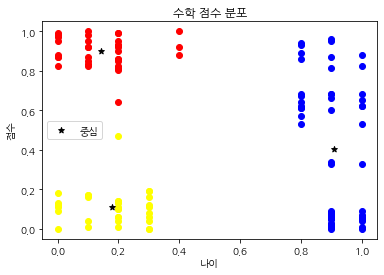

In [14]:
from matplotlib import pyplot as plt

df1 = df[df['클러스터'] == 0] # 클러스터 열의 값이 0인 데이터 모음 : df1.  
df2 = df[df['클러스터'] == 1] # 클러스터 열의 값이 1인 데이터 모음 : df2.
df3 = df[df['클러스터'] == 2] # 클러스터 열의 값이 2인 데이터 모음 : df3. 

plt.scatter(df1['나이'],df1['점수'],color = 'red') # x축을 나이, y축을 점수로 했을 때의 산점도를 붉은색으로 설정. 
plt.scatter(df2['나이'],df2['점수'],color = 'blue') # x축을 나이, y축을 점수로 했을 때의 산점도를 파랑색으로 설정. 
plt.scatter(df3['나이'],df3['점수'],color = 'yellow')# x축을 나이, y축을 점수로 했을 때의 산점도를 노랑색으로 설정. 

plt.title('수학 점수 분포')
plt.xlabel('나이')
plt.ylabel('점수')

plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], color = 'black', marker = '*', label = '중심') #별모양으로 중심을 표시합니다. 
plt.legend()

plt.show()